In [3]:
import pandas as pd

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
data=pd.read_csv('/content/energy_data_set.csv')

In [5]:
# Display the first few rows of the dataset
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
data.shape

(19735, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
# Check if we have any duplicated data
any(data.duplicated())

False

In [9]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [18]:
#Number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [19]:
# Divide the columns based on type for clear column management

col_time=["date"]

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"]
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [20]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [21]:
feature_vars=data.drop(columns=['Appliances'])
target_vars=data['Appliances']

In [22]:
feature_vars.shape

(19735, 28)

In [23]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

,count
lights,
0,15252
10,2212
20,1624
30,559
40,77
50,9
70,1
60,1


In [24]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
feature_vars.drop(['lights'], axis=1 , inplace= True) ;

In [25]:
feature_vars.head(3)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [26]:
data['date'] = pd.to_datetime(data['date']) # This line caused the error in the previous execution
data = data.set_index('date') # This line caused the error in the previous execution


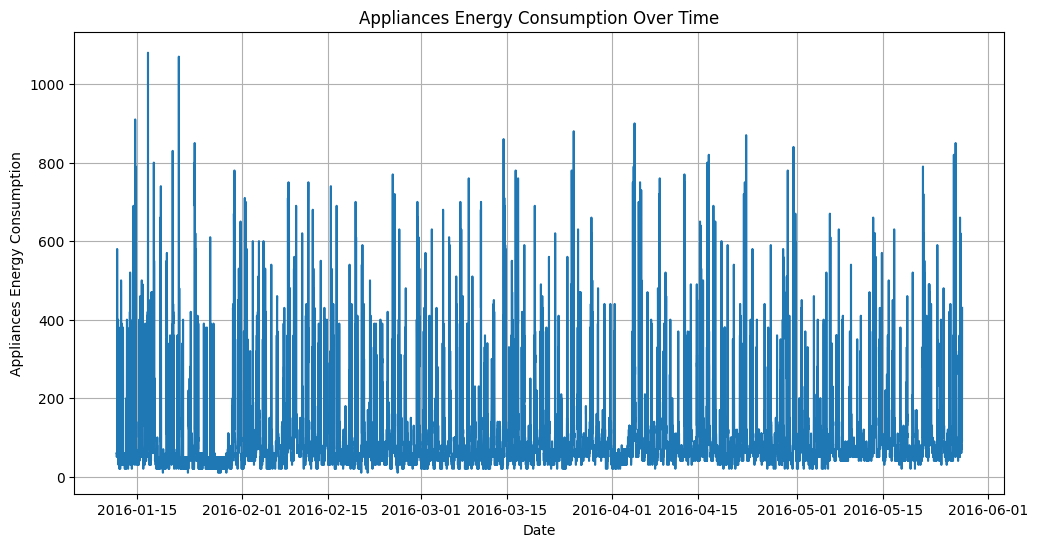

In [27]:
import matplotlib.pyplot as plt

# ensure your date column is a datetime
# data['date'] = pd.to_datetime(data['date']) # This line caused the error in the previous execution
# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Appliances'])
plt.xlabel('Date')
plt.ylabel('Appliances Energy Consumption')
plt.title('Appliances Energy Consumption Over Time')
plt.grid(True)
plt.show()

In [28]:
# Seconds from midnight
data['NSM'] = data.index.hour * 3600 + data.index.minute * 60 + data.index.second

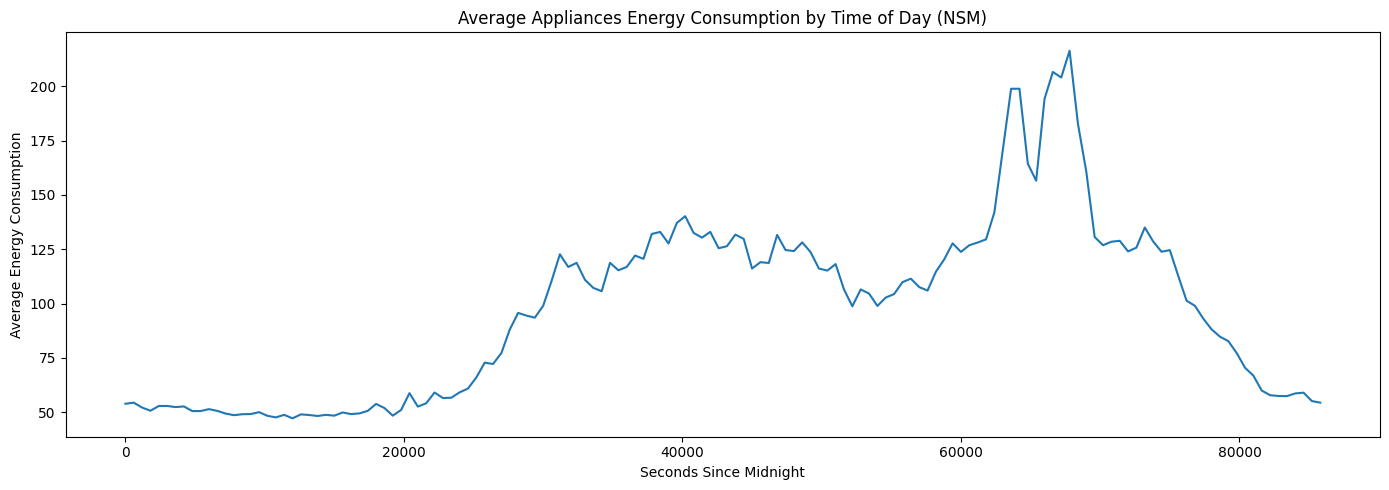

In [29]:
# Average energy by second of day (NSM)
avg_by_nsm = data.groupby('NSM')['Appliances'].mean()

plt.figure(figsize=(14, 5))
plt.plot(avg_by_nsm)
plt.title('Average Appliances Energy Consumption by Time of Day (NSM)')
plt.xlabel('Seconds Since Midnight')
plt.ylabel('Average Energy Consumption')
plt.tight_layout()
plt.show()
#How energy usage peaks across different times of day (via NSM)

In [30]:
# Day of week (0=Monday, 6=Sunday)
data['dayofweek'] = data.index.dayofweek

# WeekStatus: 0 for Weekday, 1 for Weekend
data['WeekStatus'] = data['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

#Month: 1 to 12
data['month'] = data.index.month

In [122]:
data['WeekStatus'].value_counts()# There are 5472 weekend recordings

,count
WeekStatus,
0,14263
1,5472


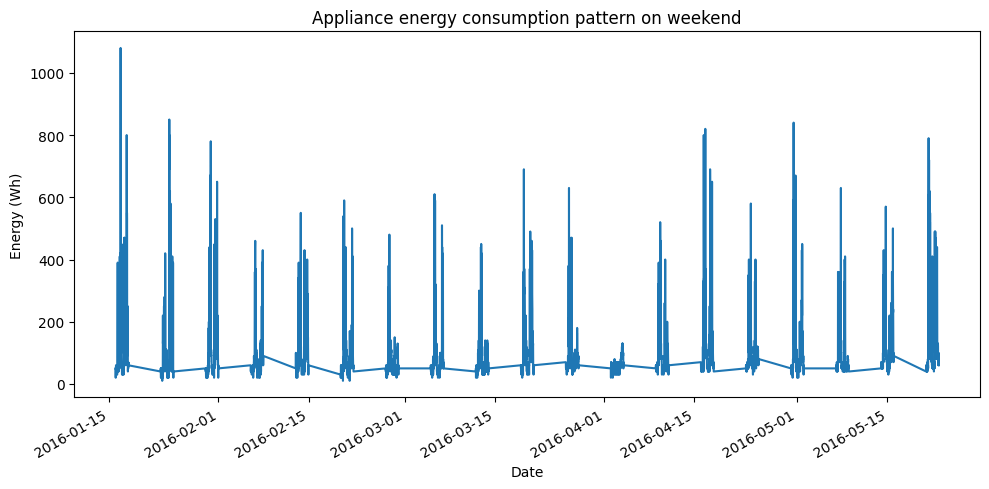

In [123]:
import matplotlib.pyplot as plt

# Filter for weekend data
temp_weekend = data[data['WeekStatus'] == 1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot
ax.plot(
    temp_weekend.index,
    temp_weekend['Appliances'],
    linestyle='-',
    marker=None
)

# Labels and title
ax.set_title('Appliance energy consumption pattern on weekend')
ax.set_xlabel('Date')
ax.set_ylabel('Energy (Wh)')

# Improve date formatting on the x-axis
fig.autofmt_xdate()  # rotates & right-aligns the dates

# Layout and display
plt.tight_layout()
plt.show()


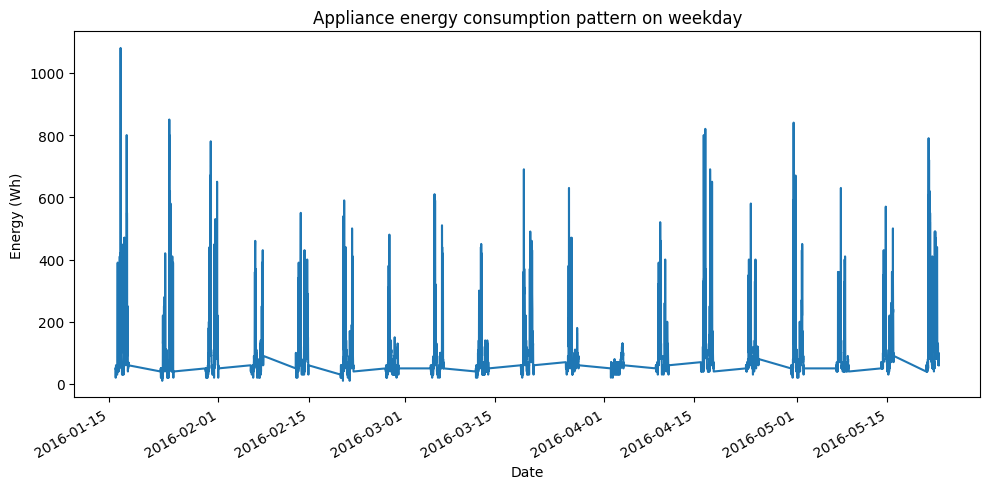

In [124]:
temp_weekday = data[data['WeekStatus'] == 0]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot
ax.plot(
    temp_weekend.index,
    temp_weekend['Appliances'],
    linestyle='-',
    marker=None
)

# Labels and title
ax.set_title('Appliance energy consumption pattern on weekday')
ax.set_xlabel('Date')
ax.set_ylabel('Energy (Wh)')

# Improve date formatting on the x-axis
fig.autofmt_xdate()  # rotates & right-aligns the dates

# Layout and display
plt.tight_layout()
plt.show()

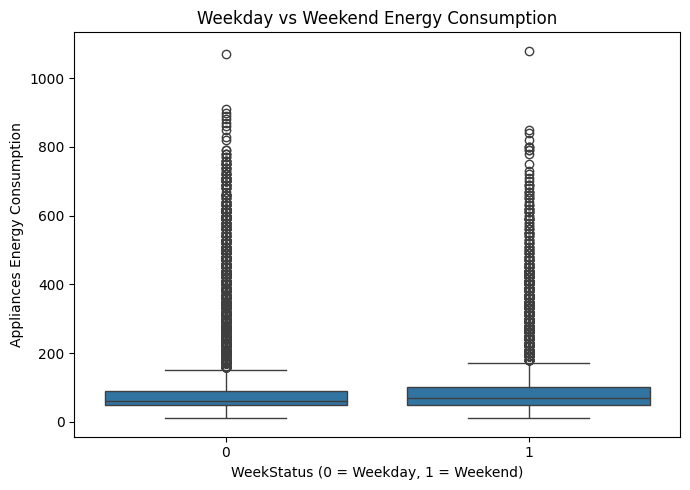

In [125]:
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.boxplot(x='WeekStatus', y='Appliances', data=data)
plt.title('Weekday vs Weekend Energy Consumption')
plt.xlabel('WeekStatus (0 = Weekday, 1 = Weekend)')
plt.ylabel('Appliances Energy Consumption')
plt.tight_layout()
plt.show()
#Whether weekends or specific weekdays differ in consumption

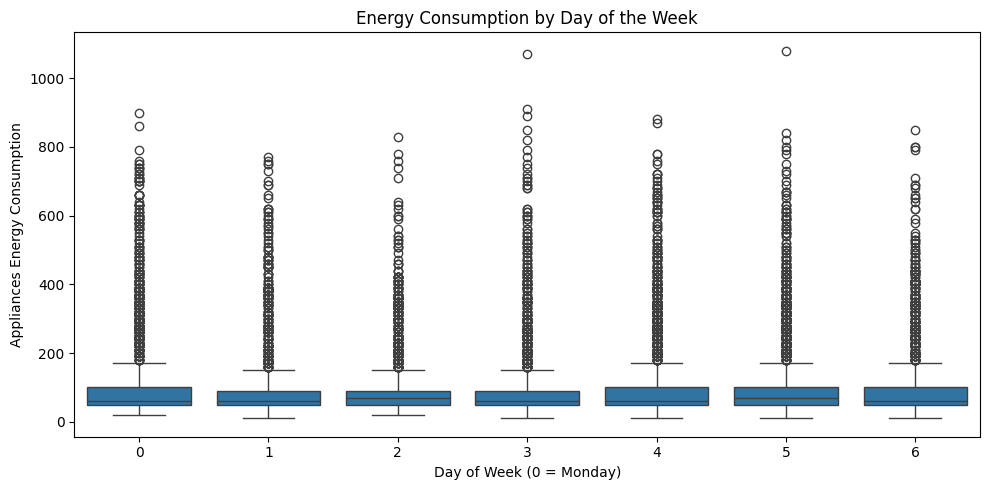

In [126]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='dayofweek', y='Appliances', data=data)
plt.title('Energy Consumption by Day of the Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Appliances Energy Consumption')
plt.tight_layout()
plt.show()

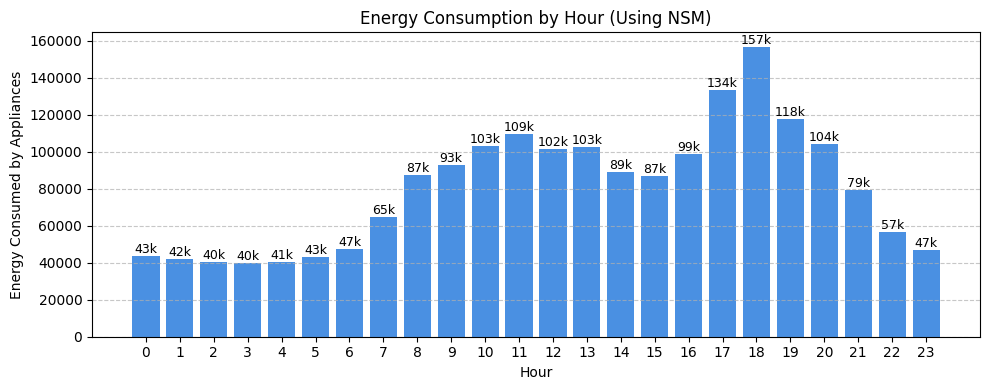

In [127]:
import matplotlib.pyplot as plt

# Step 1: Convert NSM to hour
data['hour'] = (data['NSM'] // 3600).astype(int)

# Step 2: Group by hour and sum appliances
app_hour = data.groupby('hour', as_index=False)['Appliances'].sum()

# Step 3: Optional — define a color (if not already set)
color = '#4A90E2'

# Step 4: Function to format labels
def format_value(value):
    if value < 1000:
        return f"{value:.0f}"
    elif value < 10000:
        return f"{value/1000:.1f}k"
    else:
        return f"{value/1000:.0f}k"

# Step 5: Plotting
plt.figure(figsize=(10, 4))
bars = plt.bar(app_hour['hour'], app_hour['Appliances'], color=color)

# Add labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height),
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Hour')
plt.ylabel('Energy Consumed by Appliances')
plt.title('Energy Consumption by Hour (Using NSM)')
plt.xticks(app_hour['hour'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [128]:
# Calculate the total energy consumed by the appliance per hour
app_week_day =data.groupby(by='dayofweek',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_week_day.sort_values(by='Appliances',ascending=False)

,dayofweek,Appliances
0,0,309610
4,4,297650
5,5,290690
3,3,260450
6,6,259690
2,2,259000
1,1,250920


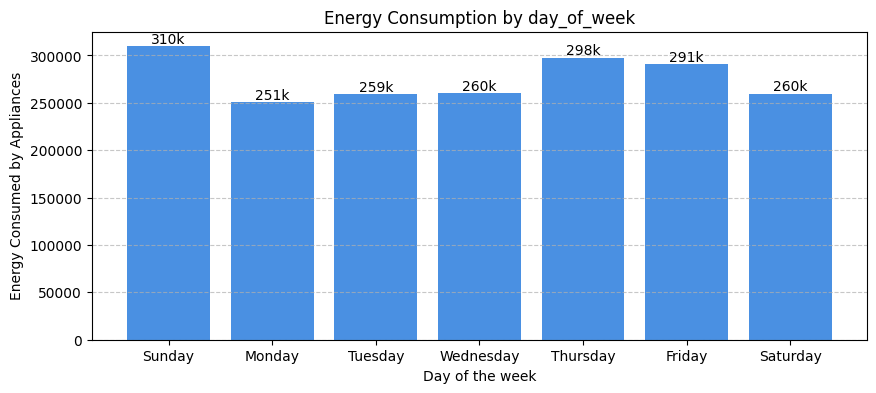

In [129]:
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_week_day['dayofweek'], app_week_day['Appliances'], color=color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Day of the week')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by day_of_week')  # Set the title
plt.xticks(list(day_names.keys()), list(day_names.values()))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the p

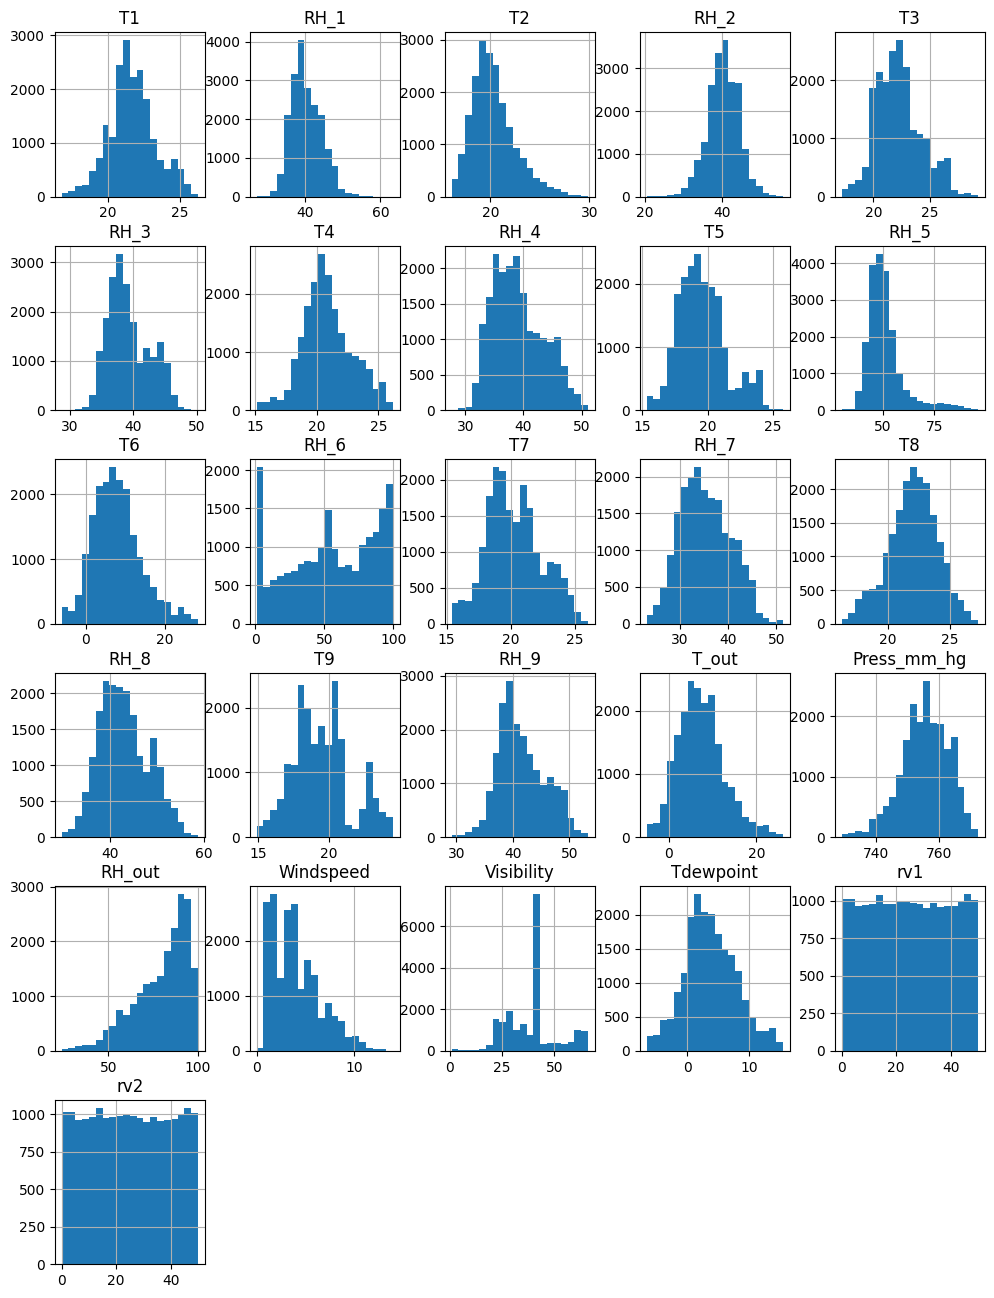

In [130]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

/tmp/ipython-input-131-242500766.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipython-input-131-242500766.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipython-input-131-242500766.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your co

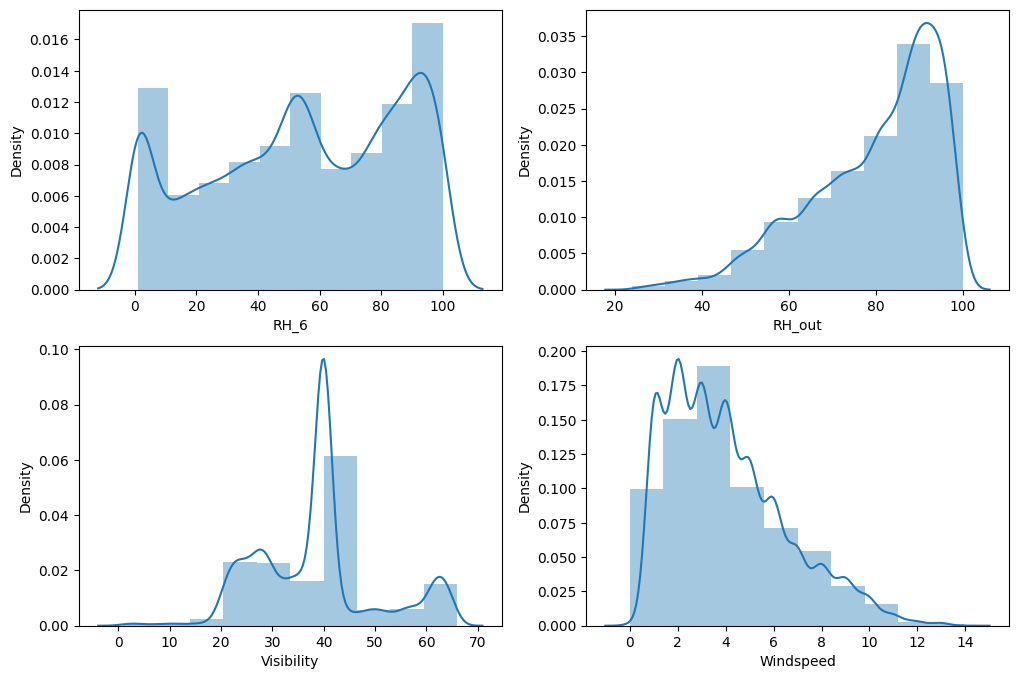

In [131]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

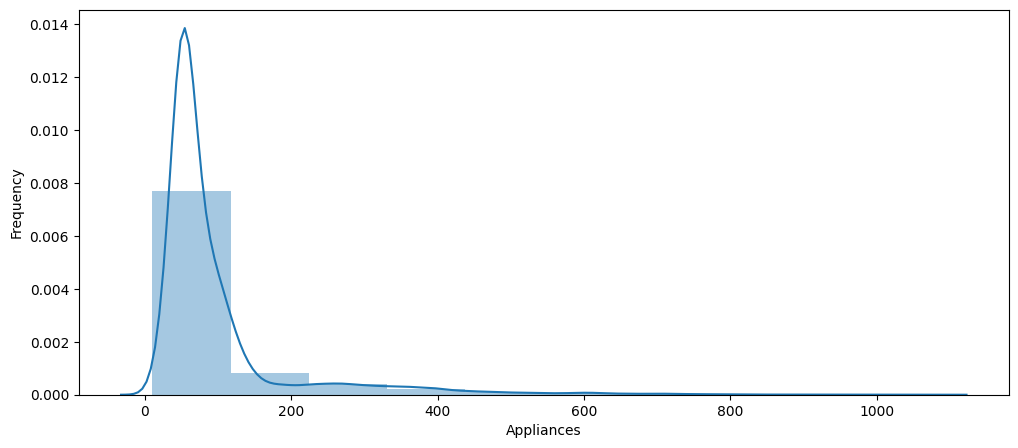

In [57]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [132]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
90.29136052698252


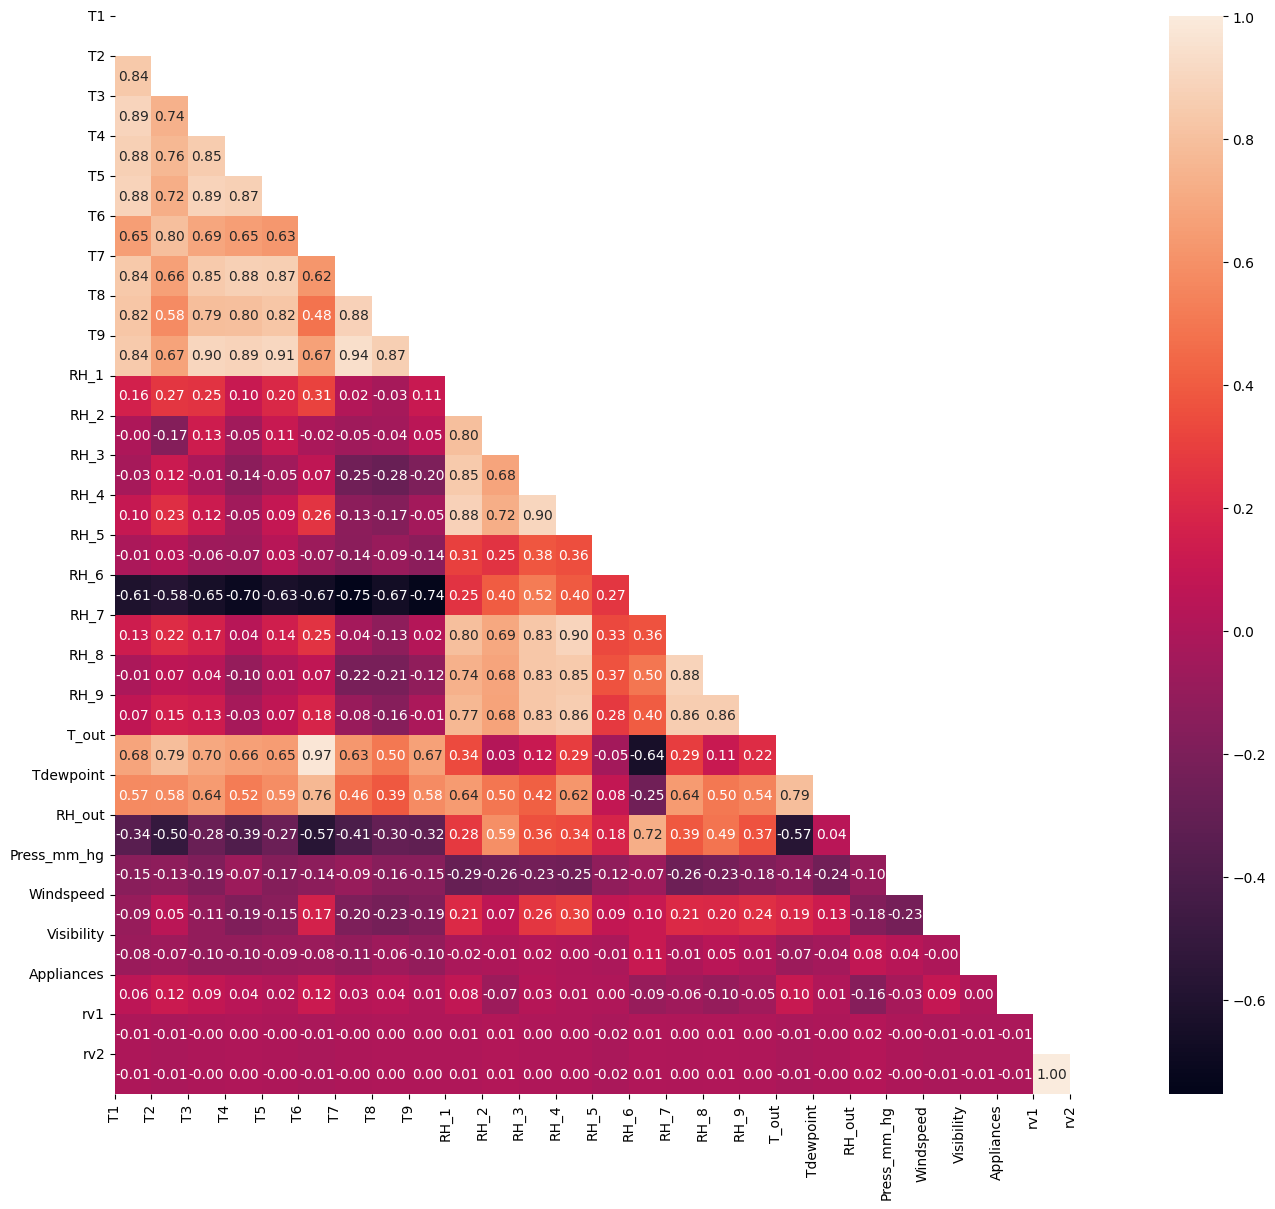

In [133]:
# Use the weather , temperature , applainces and random column to see the correlation
import numpy as np

train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

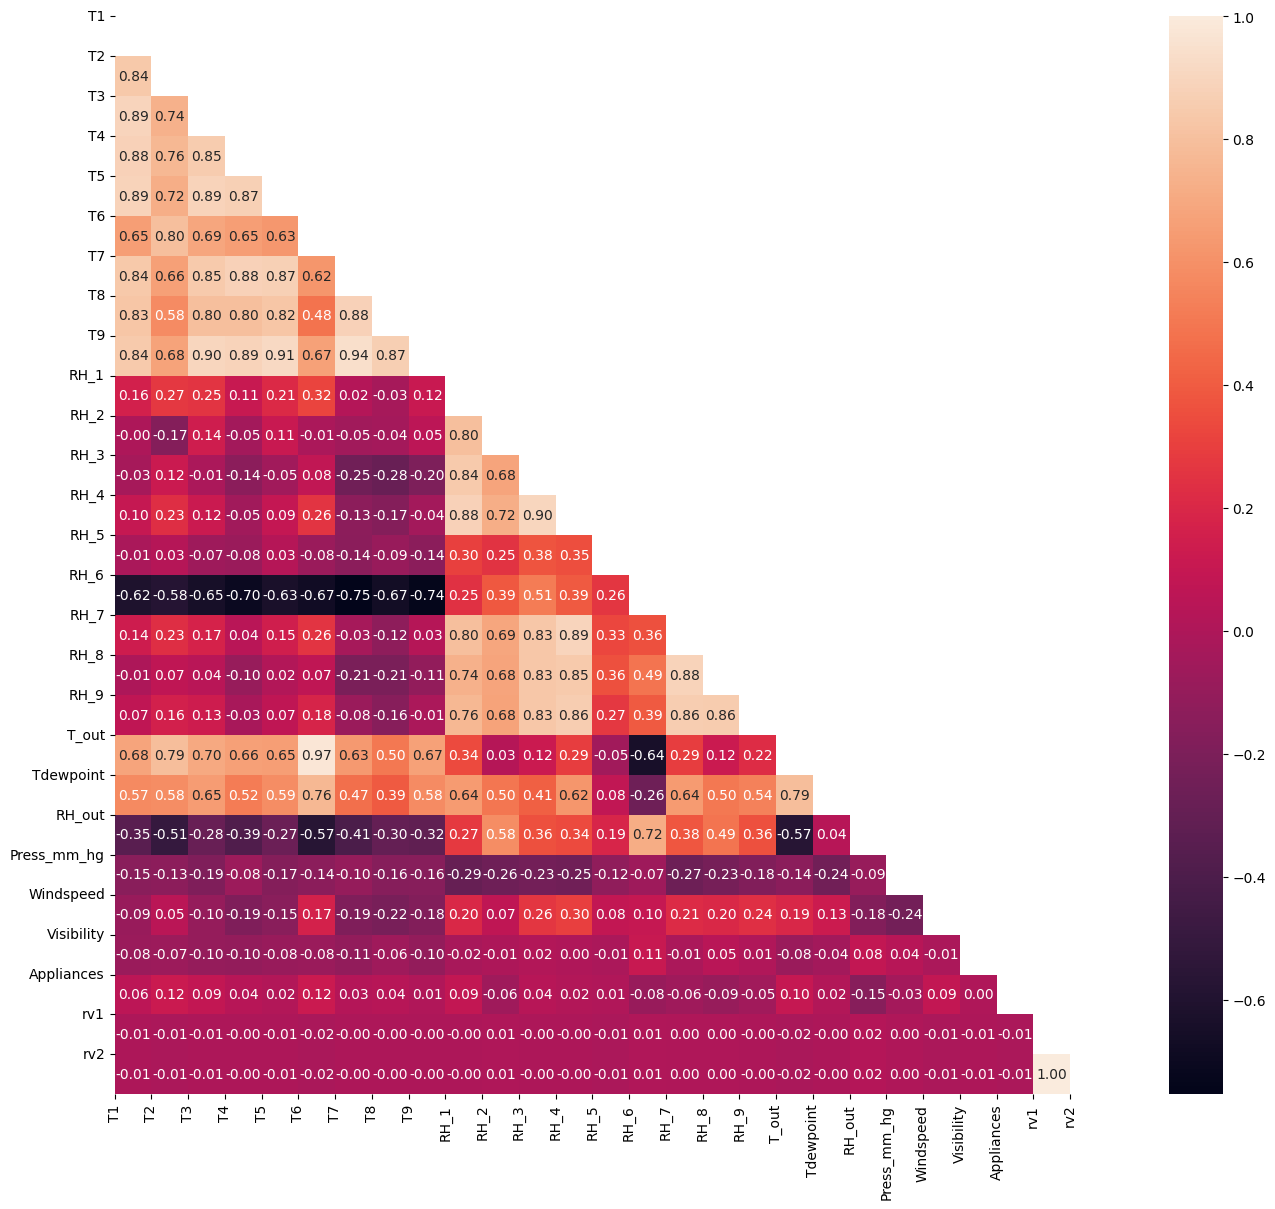

In [134]:
# Use the weather , temperature , applainces and random column to see the correlation
import numpy as np

train_corr = data[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [135]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
RH_1  RH_3     0.844677
T1    T7       0.838705
      T2       0.836834
RH_3  RH_9     0.833538
      RH_7     0.832685
      RH_8     0.828822
T1    T8       0.825413
T5    T8       0.824981
T2    T6       0.801186
RH_1  RH_7     0.801122
      RH_2     0.797535
T4    T8       0.796256
T3    T8       0.795283
T2    T_out    0.792255
dtype: float64

In [136]:
feature_vars.columns

Index(['date', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [222]:
from sklearn.model_selection import train_test_split

# Independent and dependent variables
X = data.drop(['Appliances','lights'], axis=1)
y = data['Appliances']


# 75% train, 25% test
train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=40
)
#train_X.drop(['date'], axis=1, inplace=True)


In [199]:
train_X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM', 'dayofweek', 'WeekStatus', 'month', 'hour'],
      dtype='object')

In [190]:
!pip install boruta

In [200]:
train_X.shape

(14801, 31)

In [201]:
train_X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM', 'dayofweek', 'WeekStatus', 'month', 'hour'],
      dtype='object')

In [202]:
train_y.shape

(14801,)

In [203]:
train_X.values

array([[22.6       , 34.7       , 19.5       , ...,  0.        ,
         3.        , 23.        ],
       [23.7       , 40.29      , 21.        , ...,  0.        ,
         5.        ,  4.        ],
       [22.2       , 45.8       , 20.46333333, ...,  1.        ,
         3.        , 19.        ],
       ...,
       [21.6       , 37.46666667, 22.2       , ...,  0.        ,
         4.        ,  9.        ],
       [23.175     , 37.7225    , 22.85666667, ...,  0.        ,
         4.        , 18.        ],
       [21.6       , 38.7       , 18.7       , ...,  0.        ,
         4.        ,  4.        ]])

In [204]:
#Boruta algorith for feature selection
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from datetime import datetime

X=train_X.values
y=train_y.values
y=y.ravel()

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

rfc = RandomForestRegressor(n_estimators=100, max_depth=6, criterion='mse')
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(X, y)
timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	15
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	15
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	15
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	15
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	13
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	12
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	13
Tentative: 	12
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	13
Tentative: 	12
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	14
Tentative: 	11
Rejec

In [205]:
# Boolean masks from the fitted Boruta selector
confirmed_mask = boruta_selector.support_        # True for confirmed features
tentative_mask = boruta_selector.support_weak_  # True for the one left tentative

# Map back to your original column names
all_features      = train_X.columns
confirmed_feats   = all_features[confirmed_mask]
tentative_feats   = all_features[tentative_mask]
rejected_feats    = all_features[~(confirmed_mask | tentative_mask)]

print("✅ Confirmed features (22):")
print(list(confirmed_feats))

print("\n⚠️ Tentative feature (1):")
print(list(tentative_feats))

print("\n❌ Rejected features (3):")
print(list(rejected_feats))


✅ Confirmed features (22):
['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out', 'Press_mm_hg', 'NSM', 'dayofweek', 'month', 'hour']

⚠️ Tentative feature (1):
['T1', 'T5']

❌ Rejected features (3):
['RH_9', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'WeekStatus']


In [207]:
import numpy as np
import pandas as pd

# 1) Your Boruta-confirmed list
confirmed = [
    'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out', 'Press_mm_hg', 'NSM', 'dayofweek', 'month', 'hour',
    'T1', 'T5'
]

# 2) Compute the absolute correlation matrix on your cleaned df
corr = data[confirmed].corr().abs()

# 3) Select the upper triangle of that matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# 4) Find columns to drop (any with a correlation > 0.90)
to_drop = [col for col in upper.columns if any(upper[col] > 0.90)]

print("Highly collinear, dropping these:", to_drop)

# 5) Your final feature set = confirmed minus the drops
final_features = [f for f in confirmed if f not in to_drop]
print("\n✅ Final feature list (after de-duplication):")
print(final_features)


Highly collinear, dropping these: ['T9', 'T_out', 'hour', 'T5']

✅ Final feature list (after de-duplication):
['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'Press_mm_hg', 'NSM', 'dayofweek', 'month', 'T1']


In [241]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T9","WeekStatus","hour","T9","T_out"],axis=1 , inplace=True)

# Due to conlusion made above below columns are removed

test_X.drop(["rv1","rv2","Visibility","T9","WeekStatus","hour","T9","T_out"], axis=1, inplace=True)

In [242]:
test_X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Tdewpoint', 'NSM', 'dayofweek', 'month'],
      dtype='object')

In [243]:
train_X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Tdewpoint', 'NSM', 'dayofweek', 'month'],
      dtype='object')

In [244]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [245]:
sc_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,RH_9,Press_mm_hg,RH_out,Windspeed,Tdewpoint,NSM,dayofweek,month,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-03-17 23:40:00,0.569827,-1.398755,-0.383584,-0.629413,-0.384018,-1.197521,0.996241,-1.234796,-0.229230,2.267242,...,-0.848083,-1.033732,1.167725,0.529878,-1.112160,-0.803979,1.702218,0.01507,-0.077382,-0.270443
2016-05-25 04:40:00,1.254979,0.004687,0.298556,0.604569,1.561061,0.228904,1.344290,-0.009491,0.163277,-1.454588,...,0.086994,0.725258,0.226014,0.931169,-1.248270,0.365687,-1.045233,-0.48730,1.416856,-0.464759
2016-03-26 19:40:00,0.320681,1.388043,0.054501,1.101918,0.366012,-0.212353,-0.229283,1.045908,0.145189,-0.101804,...,0.163327,-0.049050,-0.733721,-0.896934,0.929492,0.803317,1.123808,1.01981,-0.077382,0.021032
2016-04-28 01:10:00,-0.246127,-1.125096,-0.961129,-0.629413,-0.489022,-1.367589,-0.159019,-0.852893,-0.162305,1.009651,...,0.001120,-1.368892,-0.046587,0.975757,-0.839939,-1.006881,-1.551342,0.01507,0.669737,-0.561918
2016-02-01 05:40:00,-0.246127,1.789743,-0.024324,1.680118,-0.300681,2.300361,-1.013618,2.332439,-0.061616,0.137914,...,2.777725,2.719419,0.419763,0.864287,1.065602,1.400086,-0.900630,-1.49204,-0.824501,-0.464759


In [246]:
sc_test.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,RH_9,Press_mm_hg,RH_out,Windspeed,Tdewpoint,NSM,dayofweek,month,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-02-24 13:20:00,-0.678526,-0.352449,-0.337714,-0.426736,-0.758967,0.306431,-0.272083,-0.401012,-0.811540,-0.143165,...,-0.731388,-0.437093,0.377392,-1.318014,-0.809142,-1.157146,0.192964,-0.507012,-0.817065,-0.367942
2016-04-05 19:50:00,0.814344,0.671740,0.289201,1.084770,1.432662,-0.220306,0.317741,0.536605,1.062631,2.416950,...,-0.989635,-0.554766,-0.401660,-0.967649,0.004891,0.485626,1.126427,-1.014538,0.674113,3.087003
2016-02-24 06:10:00,-0.850621,-0.182731,-1.058130,0.160016,-0.526796,0.427270,-0.515812,-0.182312,-0.654758,0.788775,...,0.538598,0.705174,0.616061,1.191050,-0.876978,-1.275901,-0.836239,-0.507012,-0.817065,-0.664080
2016-05-16 22:50:00,0.938750,-0.419664,0.485399,-0.511502,0.955147,-0.885589,1.146419,-0.687958,1.134714,-1.035579,...,-0.678579,-1.043214,0.701622,-0.323430,-1.216158,0.568755,1.557256,-1.522065,1.419701,-0.565367
2016-03-18 19:10:00,0.005706,-0.797748,-0.368370,-0.320955,-0.396714,-1.037265,-0.137220,-1.182747,-0.595289,-0.564532,...,-1.028276,-1.198139,0.917775,0.524227,0.004891,-0.001268,1.030687,0.508041,-0.071476,0.224334


In [247]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [248]:
train_X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,RH_9,Press_mm_hg,RH_out,Windspeed,Tdewpoint,NSM,dayofweek,month
date,,,,,,,,,,,,,,,,,,,,,
2016-03-17 23:40:00,0.569827,-1.398755,-0.383584,-0.629413,-0.384018,-1.197521,0.996241,-1.234796,-0.229230,2.267242,...,0.441571,-0.848083,-1.033732,1.167725,0.529878,-1.112160,-0.803979,1.702218,0.01507,-0.077382
2016-05-25 04:40:00,1.254979,0.004687,0.298556,0.604569,1.561061,0.228904,1.344290,-0.009491,0.163277,-1.454588,...,1.112907,0.086994,0.725258,0.226014,0.931169,-1.248270,0.365687,-1.045233,-0.48730,1.416856
2016-03-26 19:40:00,0.320681,1.388043,0.054501,1.101918,0.366012,-0.212353,-0.229283,1.045908,0.145189,-0.101804,...,0.822507,0.163327,-0.049050,-0.733721,-0.896934,0.929492,0.803317,1.123808,1.01981,-0.077382
2016-04-28 01:10:00,-0.246127,-1.125096,-0.961129,-0.629413,-0.489022,-1.367589,-0.159019,-0.852893,-0.162305,1.009651,...,0.087967,0.001120,-1.368892,-0.046587,0.975757,-0.839939,-1.006881,-1.551342,0.01507,0.669737
2016-02-01 05:40:00,-0.246127,1.789743,-0.024324,1.680118,-0.300681,2.300361,-1.013618,2.332439,-0.061616,0.137914,...,-0.564579,2.777725,2.719419,0.419763,0.864287,1.065602,1.400086,-0.900630,-1.49204,-0.824501


In [249]:
train_y.head()

,Appliances
date,
2016-03-17 23:40:00,-0.270443
2016-05-25 04:40:00,-0.464759
2016-03-26 19:40:00,0.021032
2016-04-28 01:10:00,-0.561918
2016-02-01 05:40:00,-0.464759


In [250]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

models = [
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()]
]

In [251]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [252]:
model_data

[{'Name': 'RandomForest ',
  'Train_Time': 46.385637521743774,
  'Train_R2_Score': 0.9424237957312007,
  'Test_R2_Score': 0.5896645373071008,
  'Test_RMSE_Score': 0.6405743225363465},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 11.98918104171753,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.6548354664387757,
  'Test_RMSE_Score': 0.5875070497970423}]

In [253]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,RandomForest,46.385638,0.942424,0.589665,0.640574
1,ExtraTreeRegressor :,11.989181,1.000000,0.654835,0.587507


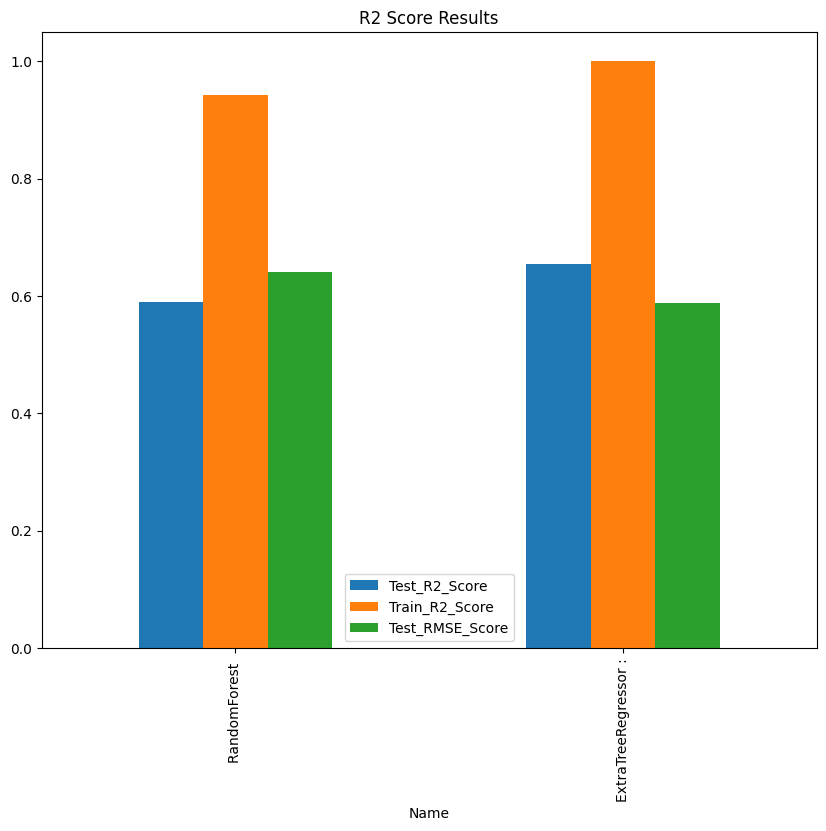

In [254]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [255]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [256]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200}

In [257]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

1.0

In [258]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.6485774560567229

In [259]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

np.float64(0.5928090282234888)

In [260]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

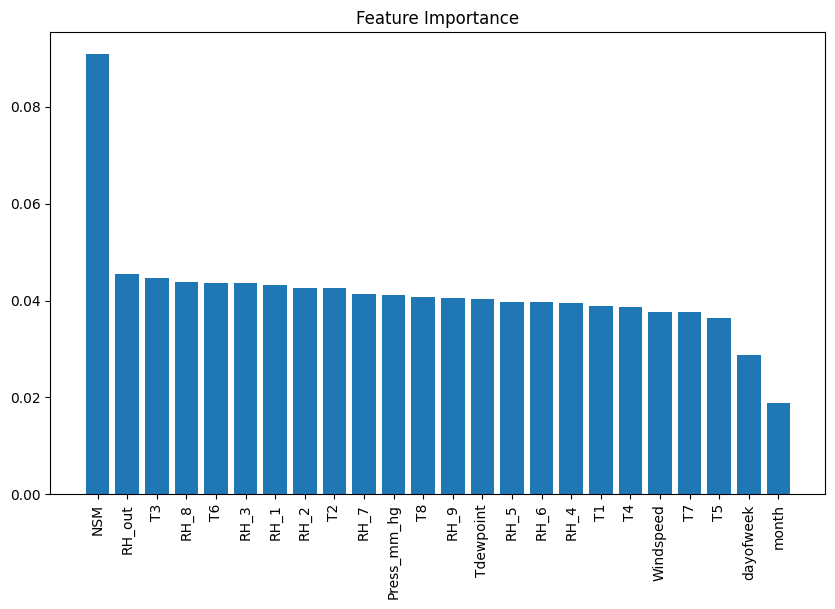

In [261]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

LSTM


In [1]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [21]:
import pandas as pd

# 1. Load and copy
df = pd.read_csv('/content/energy_data_set.csv')
data1 = df.copy()

# 2. Parse the date column
data1['date'] = pd.to_datetime(data1['date'])


# 4. Define your time, target and feature columns

features   = [
    'NSM', 'RH_out', 'T3', 'RH_8', 'T6', 'RH_3', 'RH_1', 'RH_2',
    'T2', 'RH_7', 'Press_mm_hg', 'T8', 'RH_9', 'Tdewpoint', 'RH_5',
    'RH_6', 'T1', 'T4', 'Windspeed', 'T7', 'T5'
]

# 5. Select them in one go
selected_cols = [col_target, col_time] + features
data1 = data1[selected_cols]


In [18]:
# convert series to supervised learning
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()

    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [97]:
data1

,Appliances,NSM,RH_out,T3,RH_8,T6,RH_3,RH_1,RH_2,T2,...,T8,RH_9,Tdewpoint,RH_5,RH_6,T1,T4,Windspeed,T7,T5
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,61200,92.000000,19.790000,48.900000,7.026667,44.730000,47.596667,44.790000,19.200000,...,18.2000,45.5300,5.300000,55.200000,84.256667,19.890000,19.000000,7.000000,17.200000,17.166667
2016-01-11 17:10:00,60,61800,92.000000,19.790000,48.863333,6.833333,44.790000,46.693333,44.722500,19.200000,...,18.2000,45.5600,5.200000,55.200000,84.063333,19.890000,19.000000,6.666667,17.200000,17.166667
2016-01-11 17:20:00,50,62400,92.000000,19.790000,48.730000,6.560000,44.933333,46.300000,44.626667,19.200000,...,18.2000,45.5000,5.100000,55.090000,83.156667,19.890000,18.926667,6.333333,17.200000,17.166667
2016-01-11 17:30:00,50,63000,92.000000,19.790000,48.590000,6.433333,45.000000,46.066667,44.590000,19.200000,...,18.1000,45.4000,5.000000,55.090000,83.423333,19.890000,18.890000,6.000000,17.133333,17.166667
2016-01-11 17:40:00,60,63600,92.000000,19.790000,48.590000,6.366667,45.000000,46.333333,44.530000,19.200000,...,18.1000,45.4000,4.900000,55.090000,84.893333,19.890000,18.890000,5.666667,17.200000,17.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,62400,55.666667,27.200000,50.074000,24.796667,41.163333,46.560000,42.025714,25.890000,...,24.7000,46.7900,13.333333,52.400000,1.000000,25.566667,24.700000,3.333333,24.500000,23.200000
2016-05-27 17:30:00,90,63000,56.000000,27.133333,49.790000,24.196667,41.223333,46.500000,42.080000,25.754000,...,24.7000,46.7900,13.300000,52.326667,1.000000,25.500000,24.700000,3.500000,24.557143,23.230000
2016-05-27 17:40:00,270,63600,56.333333,27.050000,49.660000,23.626667,41.690000,46.596667,42.768571,25.628571,...,24.7000,46.7900,13.266667,52.266667,1.000000,25.500000,24.700000,3.666667,24.540000,23.230000


In [98]:
values=data1.values
values.shape

(19735, 22)

In [99]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [100]:
reframed = series_to_supervised(scaled, 1, 1)

In [101]:
reframed.drop(reframed.columns[[22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)

values = reframed.values

In [102]:
X = values[:,:21]
Y = values[:,21]

In [103]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1)
1,0.046729,0.713287,0.894737,0.215188,0.661412,0.381070,0.746066,0.566187,0.684038,0.225345,...,0.173329,0.677290,0.538462,0.381691,0.841827,0.32735,0.351351,0.500000,0.170594,0.175506
2,0.046729,0.720280,0.894737,0.215188,0.660155,0.375443,0.748871,0.541326,0.682140,0.225345,...,0.173329,0.678532,0.533937,0.381691,0.839872,0.32735,0.351351,0.476190,0.170594,0.175506
3,0.037383,0.727273,0.894737,0.215188,0.655586,0.367487,0.755569,0.530502,0.679445,0.225345,...,0.173329,0.676049,0.529412,0.380037,0.830704,0.32735,0.344745,0.452381,0.170594,0.175506
4,0.037383,0.734266,0.894737,0.215188,0.650788,0.363800,0.758685,0.524080,0.678414,0.225345,...,0.164175,0.671909,0.524887,0.380037,0.833401,0.32735,0.341441,0.428571,0.164310,0.175506
5,0.046729,0.741259,0.894737,0.215188,0.650788,0.361859,0.758685,0.531419,0.676727,0.225345,...,0.164175,0.671909,0.520362,0.380037,0.848264,0.32735,0.341441,0.404762,0.170594,0.178691


In [104]:
print("X.shape:", X.shape)  # (n_samples, 1, n_vars)
print("y.shape:", y.shape)  # (n_samples,)


X.shape: (19734, 21)
y.shape: (19734,)


In [105]:
X

array([[0.04672897, 0.71328671, 0.89473684, ..., 0.35135135, 0.5       ,
        0.17059378],
       [0.04672897, 0.72027972, 0.89473684, ..., 0.35135135, 0.47619048,
        0.17059378],
       [0.03738318, 0.72727273, 0.89473684, ..., 0.34474474, 0.45238095,
        0.17059378],
       ...,
       [0.07476636, 0.73426573, 0.42105263, ..., 0.86486486, 0.25      ,
        0.86400969],
       [0.24299065, 0.74125874, 0.4254386 , ..., 0.86486486, 0.26190476,
        0.86239397],
       [0.38317757, 0.74825175, 0.42982456, ..., 0.86486486, 0.27380952,
        0.85862394]])

In [118]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [157]:
from tensorflow.keras.callbacks import EarlyStopping

inp_shape = (X_Train.shape[1], X_Train.shape[2])

# stop if val_loss doesn’t improve for 7 epochs, and restore the best weights
es = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)
# network architecture
model = Sequential()
model.add(LSTM(50,
               input_shape=inp_shape,
               ))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')




# fit with EarlyStopping
history = model.fit(
    X_Train, Y_Train,
    epochs=100,
    batch_size=32,
    validation_data=(X_Test, Y_Test),
    callbacks=[es],     # ← here!
    verbose=2,
    shuffle=False
)


Epoch 1/100
432/432 - 10s - 23ms/step - loss: 0.0057 - val_loss: 0.0037
Epoch 2/100
432/432 - 10s - 22ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3/100
432/432 - 4s - 10ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 4/100
432/432 - 3s - 6ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 5/100
432/432 - 6s - 15ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 6/100
432/432 - 4s - 9ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 7/100
432/432 - 4s - 9ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 8/100
432/432 - 6s - 14ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/100
432/432 - 5s - 12ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/100
432/432 - 4s - 8ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 11/100
432/432 - 5s - 10ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 12/100
432/432 - 3s - 7ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 13/100
432/432 - 6s - 14ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 14/100
432/432 - 4s - 10ms/step - loss: 0.0027 - val_loss: 0.0031
Epoc

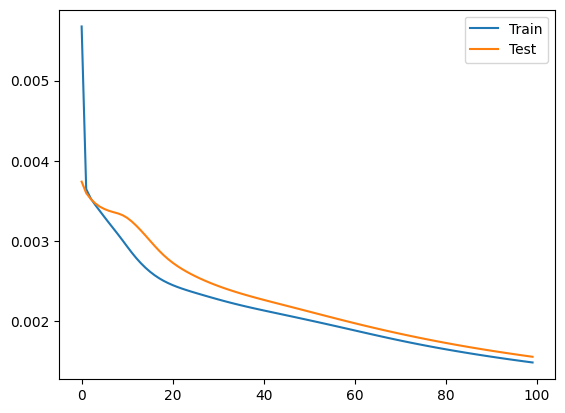

In [158]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [159]:
sca=DataFrame(scaled)
sca.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.046729,0.713287,0.894737,0.215188,0.661412,0.381070,0.746066,0.566187,0.684038,0.225345,...,0.173329,0.677290,0.538462,0.381691,0.841827,0.32735,0.351351,0.500000,0.170594,0.175506
1,0.046729,0.720280,0.894737,0.215188,0.660155,0.375443,0.748871,0.541326,0.682140,0.225345,...,0.173329,0.678532,0.533937,0.381691,0.839872,0.32735,0.351351,0.476190,0.170594,0.175506
2,0.037383,0.727273,0.894737,0.215188,0.655586,0.367487,0.755569,0.530502,0.679445,0.225345,...,0.173329,0.676049,0.529412,0.380037,0.830704,0.32735,0.344745,0.452381,0.170594,0.175506
3,0.037383,0.734266,0.894737,0.215188,0.650788,0.363800,0.758685,0.524080,0.678414,0.225345,...,0.164175,0.671909,0.524887,0.380037,0.833401,0.32735,0.341441,0.428571,0.164310,0.175506
4,0.046729,0.741259,0.894737,0.215188,0.650788,0.361859,0.758685,0.531419,0.676727,0.225345,...,0.164175,0.671909,0.520362,0.380037,0.848264,0.32735,0.341441,0.404762,0.170594,0.178691


In [160]:
lstm_test_mse = model.evaluate(X_Test, Y_Test, batch_size=1)
print('Test MSE: %f'%lstm_test_mse)

5921/5921 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0015
Test MSE: 0.001555


In [161]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
The R2 score on the Train set is:	0.952
The R2 score on the Test set is:	0.951


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


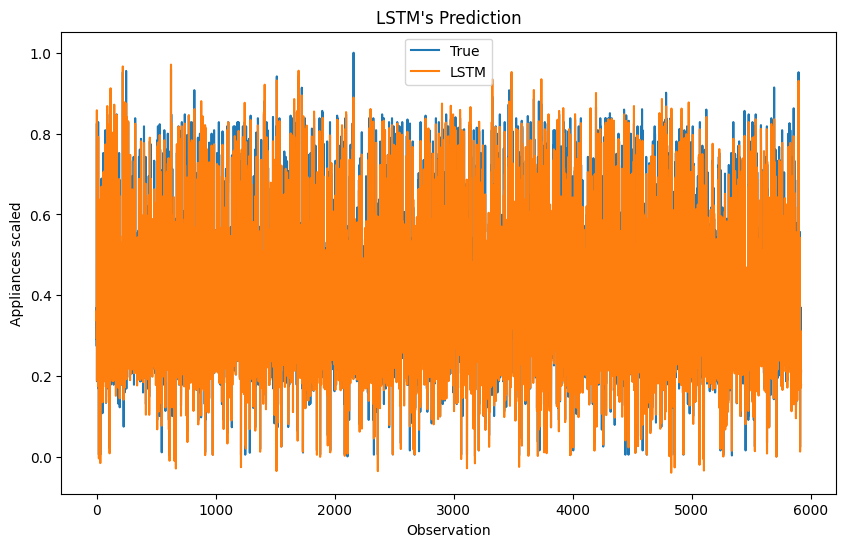

In [162]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(10, 6))
plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Appliances scaled')
plt.legend()
plt.show();

In [63]:
Y

array([0.17550565, 0.17550565, 0.17550565, ..., 0.75489728, 0.75489728,
       0.75203058])

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


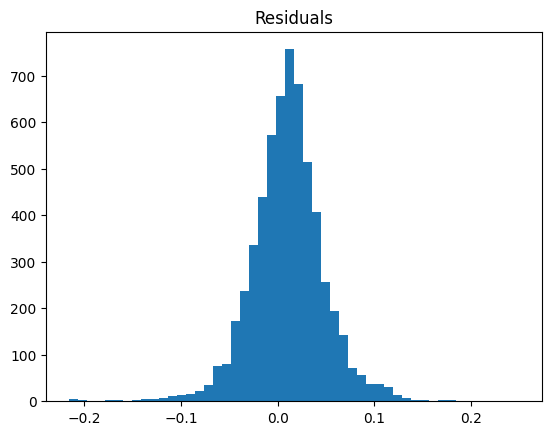

In [163]:
preds = model.predict(X_Test).flatten()
resids = Y_Test - preds
plt.hist(resids, bins=50)
plt.title("Residuals"); plt.show()


In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_Test, preds)
rmse = np.sqrt(mean_squared_error(Y_Test, preds))
print("MAE:", mae, "RMSE:", rmse)


MAE: 0.02951290404162065 RMSE: 0.039433765884331506


In [166]:
model.save('energy_consumption_lstm_model.keras')  # save in Keras format